In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
print(df_train.shape)
print(df_test.shape)

(59299, 29)
(5271, 30)


In [5]:
df_train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted'],
      dtype='object')

In [7]:
df_train["is_converted"].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

## 컬럼별 음미

### 1. bant_submit

In [18]:
np.array(df_train["bant_submit"].value_counts())/df_train.shape[0]

array([0.28992057, 0.28771143, 0.21673215, 0.19698477, 0.00865107])

In [22]:
np.array(df_test["bant_submit"].value_counts())/df_test.shape[0]

array([0.39271485, 0.28874976, 0.12654145, 0.10339594, 0.08859799])

In [19]:
df_train["bant_submit"].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

In [13]:
df_test["bant_submit"].value_counts()

bant_submit
1.00    2070
0.25    1522
0.50     667
0.75     545
0.00     467
Name: count, dtype: int64

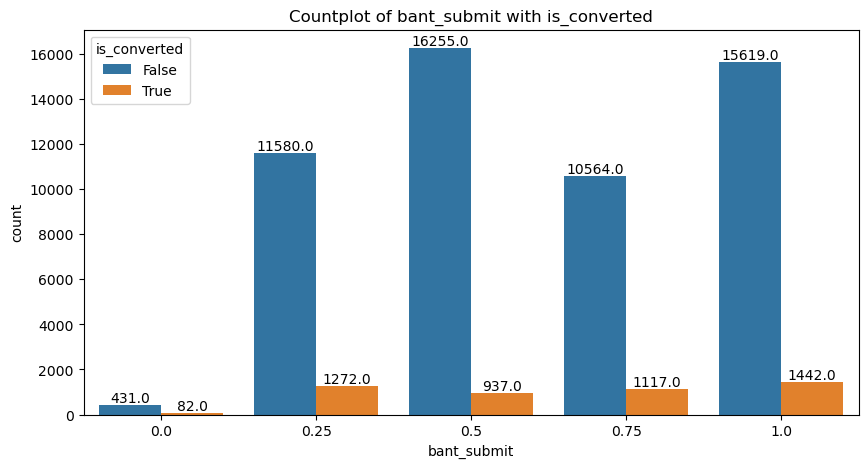

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'bant_submit'에 대한 각 카테고리의 개수를 'is_converted'에 따라 나누어 countplot 그리기
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='bant_submit', hue='is_converted', data=df_train)

# 각 막대 위에 count를 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot of bant_submit with is_converted')
plt.show()

In [28]:
correlation_value = df_train['bant_submit'].corr(df_train['is_converted'])
print(f"Correlation between 'bant_submit' and 'is_converted': {correlation_value}")

Correlation between 'bant_submit' and 'is_converted': -0.0024797749573059018


### customer_country

In [23]:
df_train["customer_country"].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

In [24]:
df_test["customer_country"].value_counts()

customer_country
/  / Peru                           184
//United States                     160
Corporate /  /                      135
/  / Brazil                         132
/  / India                          116
                                   ... 
/ São Paulo/ Guarujá / Brazil         1
/ New York  / United States           1
/ Cortes / Honduras                   1
1233 20th St NW   / Washington /      1
/ Ongole  / India                     1
Name: count, Length: 2467, dtype: int64

### 3. business_unit

In [40]:
display(df_train["business_unit"].value_counts())
display(df_test["business_unit"].value_counts())
display(np.array(df_train["business_unit"].value_counts())/df_train.shape[0])
display(np.array(df_test["business_unit"].value_counts())/df_test.shape[0])

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

business_unit
AS    2410
ID    2342
IT     519
Name: count, dtype: int64

array([4.31086528e-01, 4.17781076e-01, 1.46107017e-01, 4.99165247e-03,
       3.37273816e-05])

array([0.45721874, 0.44431797, 0.09846329])

In [38]:
df_train_t=df_train.copy()
from sklearn.preprocessing import LabelEncoder

# df_train_t의 'business_unit' 열을 레이블 인코딩
label_encoder = LabelEncoder()
df_train_t['business_unit'] = label_encoder.fit_transform(df_train_t['business_unit'])
df_train_t['business_unit'].corr(df_train_t['is_converted'])

0.07238641529485601

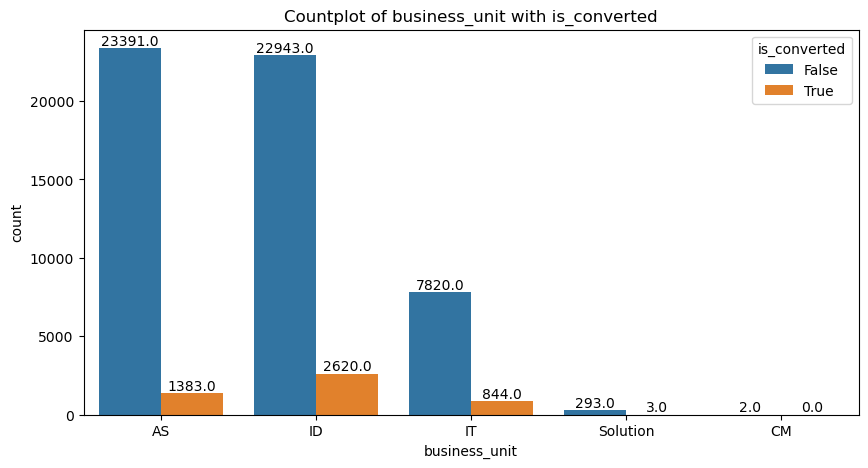

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'business_unit'에 대한 각 카테고리의 개수를 'is_converted'에 따라 나누어 countplot 그리기
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='business_unit', hue='is_converted', data=df_train)

# 각 막대 위에 count를 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot of business_unit with is_converted')
plt.show()

### 4. com_reg_ver_win_rate

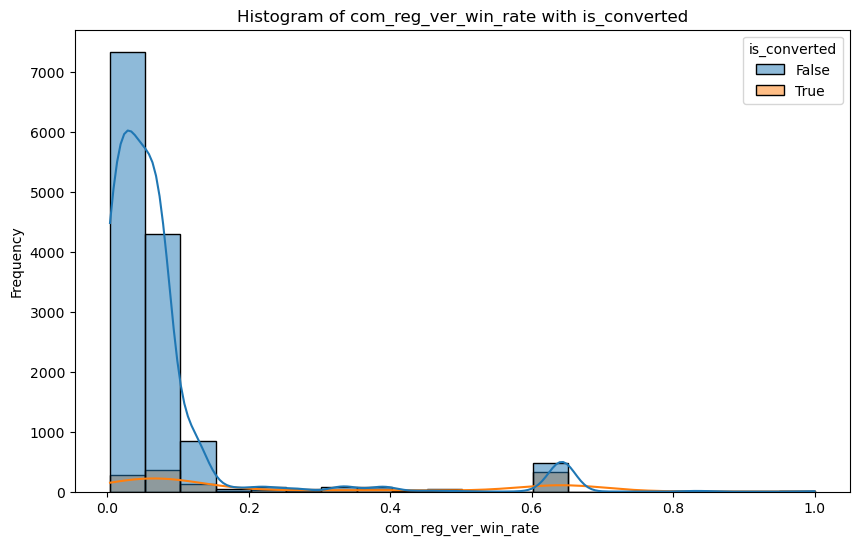

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'com_reg_ver_win_rate' 칼럼의 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='com_reg_ver_win_rate', hue='is_converted', bins=20, kde=True)
plt.title('Histogram of com_reg_ver_win_rate with is_converted')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.show()